# Quadratic Element for Poisson Equation in 2D

This example is to show the rate of convergence of the quadratic finite element
approximation of the Poisson equation on the unit square:

$$- \Delta u = f \; \hbox{in } (0,1)^2$$

for the following boundary conditions
- Non-empty Dirichlet boundary condition: $u=g_D \hbox{ on }\Gamma_D, \nabla u\cdot n=g_N \hbox{ on }\Gamma_N.$
- Pure Neumann boundary condition: $\nabla u\cdot n=g_N \hbox{ on } \partial \Omega$.
- Robin boundary condition: $g_R u + \nabla u\cdot n=g_N \hbox{ on }\partial \Omega$.

**References**:
- [Quick Introduction to Finite Element Methods](femdoc.html)
- [Introduction to Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch2FEM.pdf)
- [Progamming of Finite Element Methods](http://www.math.uci.edu/~chenlong/226/Ch3FEMCode.pdf)

**Subroutines**:

    - PoissonP2
    - squarePoisson
    - femPoisson
    - Poissonfemrate
    
The method is implemented in `PoissonP2` subroutine and can be tested in `squarePoisson`. Together with other elements (P1, P2, P3, Q1), `femPoisson` provides a concise interface to solve Poisson equation. The P2 element is tested in `PoissonP2femrate`. This doc is based on `PoissonP2femrate`.

## P2 Quadratic Element

For the quadratic element on a triangle, the local basis functions can be written in terms of barycentric coordinates. The six dofs in a triangle is displayed below. The first three are associated to the vertices of the triangle and the second three to the middle points of three edges. The edges are indexed such that the i-th edge is opposite to the i-th vertex for i=1,2,3.

Given a mesh, the required data structure can be constructured by
        
        [elem2dof,edge,bdDof] = dofP2(elem)

**A local basis of P2**

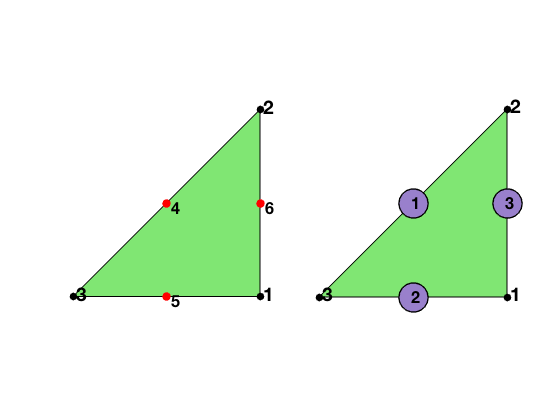

In [1]:
%% Local indexing of DOFs
node = [1,0; 1,1; 0,0];
elem = [1 2 3];
edge = [2 3; 1 3; 1 2];
% elem2dof = 1:6;
figure;
set(gcf,'Units','normal'); 
set(gcf,'Position',[0,0,0.5,0.3]);
subplot(1,2,1)
showmesh(node,elem);
findnode(node);
findedgedof(node,edge);
subplot(1,2,2)
showmesh(node,elem);
findnode(node);
findedge(node,edge);

The six Lagrange-type bases functions are denoted by $\phi_i, i=1:6$, i.e. $\phi_i(x_j)=\delta _{ij},i,j=1:6$. In
barycentric coordinates, they are 

$$ \phi_1 = \lambda_1(2\lambda_1 -1),\quad \nabla \phi_1 = \nabla \lambda_1(4\lambda_1-1),$$

$$ \phi_2 = \lambda_2(2\lambda_2 -1),\quad  \nabla \phi_2 = \nabla \lambda_2(4\lambda_2-1),$$ 

$$ \phi_3 = \lambda_3(2\lambda_3 -1),\quad  \nabla \phi_3 = \nabla \lambda_3(4\lambda_3-1),$$ 

$$ \phi_4 = 4\lambda_2\lambda_3,\quad  \nabla\phi_4 = 4\left (\lambda_2\nabla \lambda_3 + \lambda_3\nabla \lambda_2\right )\; ,$$ 

$$ \phi_5 = 4\lambda _3\lambda_1,\quad  \nabla\phi_5= 4\left (\lambda_3\nabla \lambda_1 + \lambda_1\nabla \lambda_3\right )\; ,$$ 

$$ \phi_6 = 4\lambda _1\lambda_2,\quad  \nabla\phi_6=4\left (\lambda_1\nabla \lambda_2 + \lambda_2\nabla\lambda_1\right )\; .$$

When transfer to the reference triangle formed by $(0,0),(1,0),(0,1)$, the local bases in x-y coordinate can be obtained by substituting 

$$\lambda _1 = x, \quad \lambda _2 = y, \quad \lambda _3 = 1-x-y.$$ 

## Local to global index mapp

The matrix elem2dof is the local to global index mapping of dofs. The
first 3 columns, elem2dof(:,1:3), is the global indices of dofs
associated to vertexes and thus elem2dof(:,1:3) = elem. The columns
elem2dof(:,4:6) point to indices of dofs on edges. The matrix bdDof
contains all dofs on the boundary of the mesh.

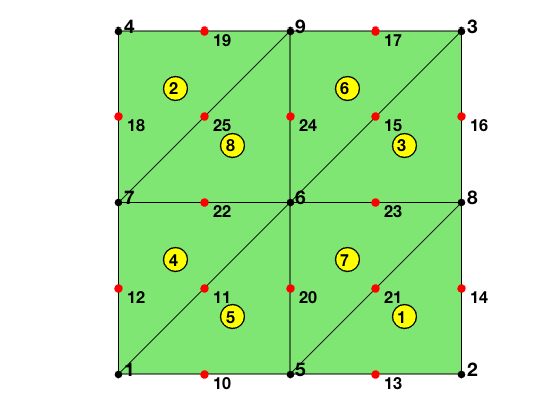

In [2]:
node = [0,0; 1,0; 1,1; 0,1];
elem = [2,3,1; 4,1,3];      
[node,elem] = uniformrefine(node,elem);
figure;
showmesh(node,elem);
findnode(node);
findelem(node,elem,'all','index','FaceColor',[0.5 0.9 0.45]);
[elem2dof,edge,bdDof] = dofP2(elem);
findedgedof(node,edge);

In [3]:
display(elem2dof);
display(bdDof);


elem2dof =

  8�6 uint32 matrix

    2    8    5   21   13   14
    4    7    9   25   19   18
    8    3    6   15   23   16
    7    1    6   11   22   12
    5    6    1   11   10   20
    9    6    3   15   17   24
    6    5    8   21   23   20
    6    9    7   25   22   24


bdDof =

     1
     2
     3
     4
     5
     7
     8
     9
    10
    12
    13
    14
    16
    17
    18
    19



## Mixed boundary condition

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     4225,  #nnz:    39184, smoothing: (1,1), iter: 11,   err = 7.55e-10,   time =  0.2 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    16641,  #nnz:   160272, smoothing: (1,1), iter: 11,   err = 7.19e-10,   time = 0.18 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    66049,  #nnz:   648208, smoothing: (1,1), iter: 11,   err = 6.86e-10,   time = 0.35 s

 #Dof       h       ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

 1089   6.25e-02   5.70490e-05   8.40318e-03   6.97560e-04   8.88533e-05
 4225   3.12e-02   7.13419e-06   2.10745e-03   1.10743e-04   1.14531e-05
16641   1.56e-02   8.92199e-07   5.27421e-04   1.82456e-05   1.45475e-06
66049   7.81e-03   1.11557e-07   1.31907e-04   3.09580e-06   1.83386e-07

 #Dof   Assemble     Solve      Error      Mesh    

 1089   9.00e-02   8.37e-03   1.00e-01   3.00e-02
 4225   7.00e-02   1.95e-01   5.00e-02   4.00e-0

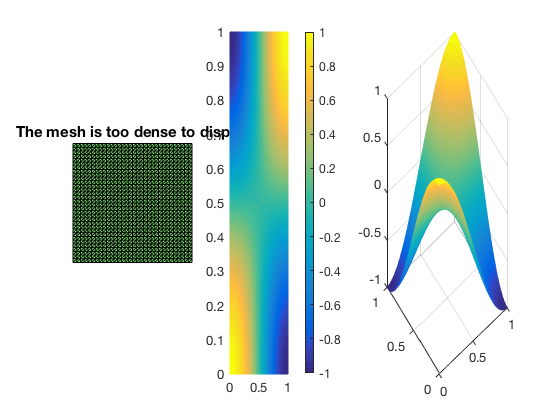

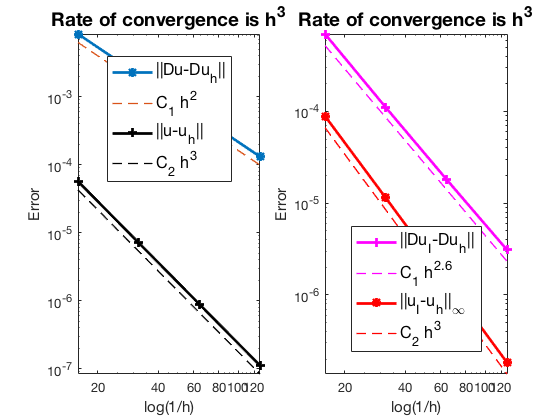

In [4]:
%% Setting
[node,elem] = squaremesh([0,1,0,1],0.25); 
mesh = struct('node',node,'elem',elem);
option.L0 = 2;
option.maxIt = 4;
option.printlevel = 1;
option.plotflag = 1;
option.elemType = 'P2';
% Mixed boundary condition
pde = sincosdata;
mesh.bdFlag = setboundary(node,elem,'Dirichlet','~(x==0)','Neumann','x==0');
femPoisson(mesh,pde,option);

## Pure Neumann boundary condition

When pure Neumann boundary condition is posed, i.e., $-\Delta u =f$ in $\Omega$ and $\nabla u\cdot n=g_N$ on $\partial \Omega$, the data should be consisitent in the sense that $\int_{\Omega} f \, dx + \int_{\partial \Omega} g \, ds = 0$. The solution is unique up to a constant. A post-process is applied such that the constraint $\int_{\Omega}u_h dx = 0$ is imposed. 

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     4225,  #nnz:    41458, smoothing: (1,1), iter: 13,   err = 5.23e-10,   time = 0.084 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    16641,  #nnz:   164850, smoothing: (1,1), iter: 14,   err = 2.47e-10,   time = 0.13 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    66049,  #nnz:   657394, smoothing: (1,1), iter: 14,   err = 5.84e-10,   time = 0.36 s

 #Dof       h       ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

 1089   6.25e-02   4.45898e-04   6.57576e-02   1.35282e-02   1.75150e-03
 4225   3.12e-02   5.64820e-05   1.67107e-02   2.25947e-03   2.36781e-04
16641   1.56e-02   7.10333e-06   4.20307e-03   3.84722e-04   3.06054e-05
66049   7.81e-03   8.90408e-07   1.05337e-03   6.65670e-05   3.88530e-06

 #Dof   Assemble     Solve      Error      Mesh    

 1089   8.00e-02   3.48e-03   3.00e-02   1.00e-02
 4225   2.00e-02   8.38e-02   2.00e-02   1.00e-

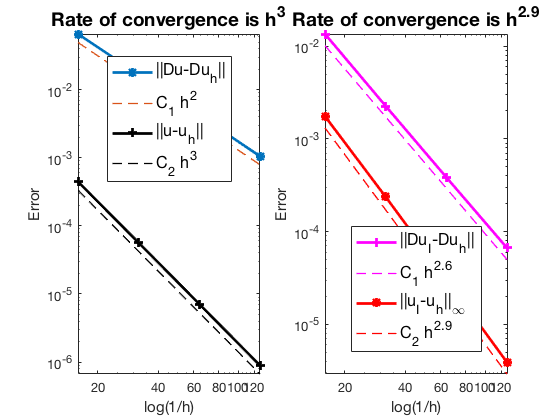

In [5]:
option.plotflag = 0;
pde = sincosNeumanndata;
mesh.bdFlag = setboundary(node,elem,'Neumann');
femPoisson(mesh,pde,option);

## Robin boundary condition

Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:     4225,  #nnz:    41473, smoothing: (1,1), iter: 11,   err = 9.54e-10,   time = 0.059 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    16641,  #nnz:   164865, smoothing: (1,1), iter: 12,   err = 1.74e-10,   time = 0.093 s
Multigrid V-cycle Preconditioner with Conjugate Gradient Method
#dof:    66049,  #nnz:   657409, smoothing: (1,1), iter: 12,   err = 1.97e-10,   time = 0.32 s

 #Dof       h       ||u-u_h||    ||Du-Du_h||   ||DuI-Du_h|| ||uI-u_h||_{max}

 1089   6.25e-02   4.46184e-04   6.57577e-02   1.36110e-02   1.73084e-03
 4225   3.12e-02   5.64917e-05   1.67107e-02   2.26778e-03   2.34617e-04
16641   1.56e-02   7.10364e-06   4.20307e-03   3.85477e-04   3.04111e-05
66049   7.81e-03   8.90418e-07   1.05337e-03   6.66341e-05   3.86933e-06

 #Dof   Assemble     Solve      Error      Mesh    

 1089   6.00e-02   2.58e-03   1.00e-02   0.00e+00
 4225   4.00e-02   5.93e-02   2.00e-02   1.00e

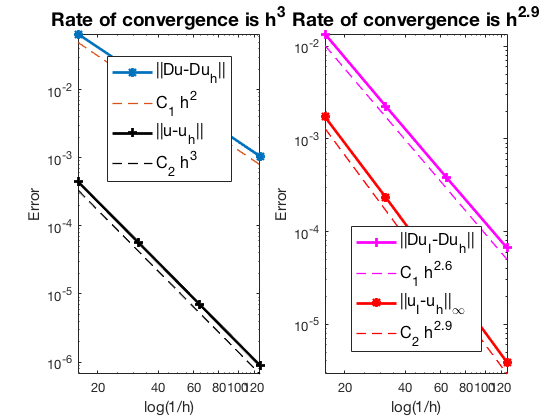

In [6]:
option.plotflag = 0;
pde = sincosRobindata;
mesh.bdFlag = setboundary(node,elem,'Robin');
femPoisson(mesh,pde,option);

## Conclusion

The optimal rate of convergence of the H1-norm (2nd order) and L2-norm (3rd order) is observed. The order of $\|\nabla u_I - \nabla u_h\|$ is 2.5 order and thus superconvergence exists.

MGCG converges uniformly in all cases.